In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import keras as kr
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers.recurrent import LSTM,GRU
import h5py
from numpy.random import seed


D:\softwares\Anaconda\envs\kr\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")
Using TensorFlow backend.
D:\softwares\Anaconda\envs\kr\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\softwares\Anaconda\envs\kr\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\softwares\Anaconda\envs\kr\lib\site-

## （1）生成j_return表格，每列中每13行代表一个样本数据，并保存

In [2]:
union = pd.read_csv("trade_data/union.csv")

In [12]:
union.trade_date[110

20170428

In [16]:
union[union.trade_date == 20170428].index.tolist()

[1108]

In [4]:
union = pd.read_csv("trade_data/union.csv")
total_map = json.load(open('total_map/total_map.txt','r'))
#生成表，并得到列名
day_map = total_map.get(str(union.season[125]))
column = list(day_map.keys())
column.append("week_date")
j_return = pd.DataFrame(columns = column)
k_period = list(range(len(union)))
k_period = k_period[72:]

In [5]:
for i in k_period:
    j_rate_ls = []
    j2_rate_ls = []
    j3_rate_ls = []
    j4_rate_ls = []
    j5_rate_ls = []
    j6_rate_ls = []
    j7_rate_ls = []
    j8_rate_ls = []
    j9_rate_ls = []
    j10_rate_ls = []
    j11_rate_ls = []
    j12_rate_ls = []
    k_rate_ls = []
    day_map = total_map.get(str(union.season[i]))
    for j in range(25):
        key = "p"+str(j+1)
        port = day_map.get(key)
        j_rate,j2_rate,j3_rate,j4_rate,j5_rate,j6_rate,j7_rate,j8_rate,j9_rate,j10_rate,j11_rate,j12_rate,k_rate = 0,0,0,0,0,0,0,0,0,0,0,0,0
        for p in port:
            j_rate += union[p][i-1]
            j2_rate += union[p][i-2]
            j3_rate += union[p][i-3]
            j4_rate += union[p][i-4]
            j5_rate += union[p][i-5]
            j6_rate += union[p][i-6]
            j7_rate += union[p][i-7]
            j8_rate += union[p][i-8]
            j9_rate += union[p][i-9]
            j10_rate += union[p][i-10]
            j11_rate += union[p][i-11]
            j12_rate += union[p][i-12]
            k_rate += union[p][i]                
        j_rate /= len(port)
        j2_rate /= len(port)
        j3_rate /= len(port)
        j4_rate /= len(port)
        j5_rate /= len(port)
        j6_rate /= len(port)
        j7_rate /= len(port)
        j8_rate /= len(port)
        j9_rate /= len(port)
        j10_rate /= len(port)
        j11_rate /= len(port)
        j12_rate /= len(port)
        k_rate /= len(port)
        
        j_rate_ls.append(j_rate)
        j2_rate_ls.append(j2_rate)
        j3_rate_ls.append(j3_rate)
        j4_rate_ls.append(j4_rate)
        j5_rate_ls.append(j5_rate)
        j6_rate_ls.append(j6_rate)
        j7_rate_ls.append(j7_rate)
        j8_rate_ls.append(j8_rate)
        j9_rate_ls.append(j9_rate)
        j10_rate_ls.append(j10_rate)
        j11_rate_ls.append(j11_rate)
        j12_rate_ls.append(j12_rate)
        k_rate_ls.append(k_rate)
    j_rate_ls.append("0")
    j2_rate_ls.append("0")
    j3_rate_ls.append("0")
    j4_rate_ls.append("0")
    j5_rate_ls.append("0")
    j6_rate_ls.append("0")
    j7_rate_ls.append("0")
    j8_rate_ls.append("0")
    j9_rate_ls.append("0")
    j10_rate_ls.append("0")
    j11_rate_ls.append("0")
    j12_rate_ls.append("0")
    k_rate_ls.append(union.trade_date[i])
            
    j_return.loc[len(j_return)]=j12_rate_ls
    j_return.loc[len(j_return)]=j11_rate_ls
    j_return.loc[len(j_return)]=j10_rate_ls
    j_return.loc[len(j_return)]=j9_rate_ls
    j_return.loc[len(j_return)]=j8_rate_ls
    j_return.loc[len(j_return)]=j7_rate_ls
    j_return.loc[len(j_return)]=j6_rate_ls
    j_return.loc[len(j_return)]=j5_rate_ls
    j_return.loc[len(j_return)]=j4_rate_ls
    j_return.loc[len(j_return)]=j3_rate_ls
    j_return.loc[len(j_return)]=j2_rate_ls
    j_return.loc[len(j_return)]=j_rate_ls
    j_return.loc[len(j_return)]=k_rate_ls
    print(i,end="  ")
    print(k_rate_ls[-1])
j_return.to_csv("LSTM_data/j_return.csv")
print("LSTM/j_return.csv")

72  19961004
73  19961011
74  19961018
75  19961025
76  19961101
77  19961108
78  19961115
79  19961122
80  19961129
81  19961206
82  19961213
83  19961220
84  19961227
85  19970103
86  19970110
87  19970117
88  19970124
89  19970131
90  19970221
91  19970228
92  19970307
93  19970314
94  19970321
95  19970328
96  19970404
97  19970411
98  19970418
99  19970425
100  19970430
101  19970509
102  19970516
103  19970523
104  19970530
105  19970606
106  19970613
107  19970620
108  19970627
109  19970704
110  19970711
111  19970718
112  19970725
113  19970801
114  19970808
115  19970815
116  19970822
117  19970829
118  19970905
119  19970912
120  19970919
121  19970926
122  19970930
123  19971010
124  19971017
125  19971024
126  19971031
127  19971107
128  19971114
129  19971121
130  19971128
131  19971205
132  19971212
133  19971219
134  19971226
135  19971231
136  19980109
137  19980116
138  19980123
139  19980213
140  19980220
141  19980227
142  19980306
143  19980313
144  19980320
145  1

660  20080725
661  20080801
662  20080808
663  20080815
664  20080822
665  20080829
666  20080905
667  20080912
668  20080919
669  20080926
670  20081010
671  20081017
672  20081024
673  20081031
674  20081107
675  20081114
676  20081121
677  20081128
678  20081205
679  20081212
680  20081219
681  20081226
682  20081231
683  20090109
684  20090116
685  20090123
686  20090206
687  20090213
688  20090220
689  20090227
690  20090306
691  20090313
692  20090320
693  20090327
694  20090403
695  20090410
696  20090417
697  20090424
698  20090430
699  20090508
700  20090515
701  20090522
702  20090527
703  20090605
704  20090612
705  20090619
706  20090626
707  20090703
708  20090710
709  20090717
710  20090724
711  20090731
712  20090807
713  20090814
714  20090821
715  20090828
716  20090904
717  20090911
718  20090918
719  20090925
720  20090930
721  20091009
722  20091016
723  20091023
724  20091030
725  20091106
726  20091113
727  20091120
728  20091127
729  20091204
730  20091211
731  2

In [2]:
#j_return.to_csv("LSTM_data/j_return.csv")
j_return=pd.read_csv("LSTM_data/j_return.csv")

## （2）生成训练数据和测试数据

In [3]:
train_data = j_return[:11479]
# train_data
x_train = np.zeros((22075,1,12))
y_train = np.zeros((22075,1))
y_train_label = np.zeros((22075,1))
for i in range(25):
    temp = train_data["p"+str(i+1)].tolist()
    me = np.median(temp)
    #order = temp.copy()
    #order.sort()
    #per75 = order[int(0.75*len(order))]
    #mi = min(temp)
    #ma = max(temp)
    #temp = [np.power((k-mi)/(ma-mi),0.5) for k in temp]
    for j in range(len(temp)//13):
        x_train[i*883+j]=temp[j*13:j*13+12]
        y_train_label[i*883+j]= 0 if temp[j*13+12]<me or temp[j*13+12]==me else 1
        y_train[i*883+j]= temp[j*13+12]

In [4]:
test_data = j_return[11479:]
# train_data
x_test = np.zeros((6400,1,12))
y_test = np.zeros((6400,1))
y_test_label = np.zeros((6400,1))
test_date = []
for i in test_data.week_date:
    if i!=0:
        test_date.append(str(int(i)))
    else:
        continue
for i in range(25):
    temp = test_data["p"+str(i+1)].tolist()
    me = np.median(temp)
    #order = temp.copy()
    #order.sort()
    #per75 = order[int(0.75*len(order))]
    for j in range(len(temp)//13):
        x_test[i*256+j]=temp[j*13:j*13+12]
        y_test_label[i*256+j]= 0 if temp[j*13+12]<me or temp[j*13+12]==me else 1
        y_test [i*256+j]= temp[j*13+12]

## （3）建立模型：48-1-48-1

In [5]:
#写一个LossHistory类，保存loss和acc
class LossHistory(kr.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        #self.val_loss = {'batch':[], 'epoch':[]}
        #self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('binary_accuracy'))
        #self.val_loss['batch'].append(logs.get('val_loss'))
        #self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('binary_accuracy'))
        #self.val_loss['epoch'].append(logs.get('val_loss'))
        #self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="best")
        plt.show()

In [6]:

history = LossHistory()
LSTMmodel = Sequential([
    Dense(50, input_shape = (1,12),activation = "tanh"),
    Dropout(0.1),
    LSTM(150,activation = "sigmoid"),
    Dropout(0.1),
    Dense(50,activation = "sigmoid"),
    Dropout(0.1),
    Dense(1,activation = "sigmoid")
    ])
LSTMmodel.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["binary_accuracy"])

Instructions for updating:
Colocations handled automatically by placer.


## （3）训练数据训练模型

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
22075/22075 [==============================] - 2s 93us/step - loss: 0.7010 - binary_accuracy: 0.4996
Epoch 2/20
22075/22075 [==============================] - 1s 49us/step - loss: 0.7010 - binary_accuracy: 0.4982
Epoch 3/20
22075/22075 [==============================] - 1s 49us/step - loss: 0.6969 - binary_accuracy: 0.5056
Epoch 4/20
22075/22075 [==============================] - 1s 51us/step - loss: 0.6955 - binary_accuracy: 0.5083
Epoch 5/20
22075/22075 [==============================] - 1s 52us/step - loss: 0.6940 - binary_accuracy: 0.5138
Epoch 6/20
22075/22075 [==============================] - 1s 50us/step - loss: 0.6922 - binary_accuracy: 0.5228
Epoch 7/20
22075/22075 [==============================] - 1s 47us/step - loss: 0.6893 - binary_accuracy: 0.5373
Epoch 8/20
22075/22075 [==============================] - 1s 49us/step - loss: 0.6866 - binary_accuracy: 0.5435
Epoch 9/20
22075/22075 [==============================] 

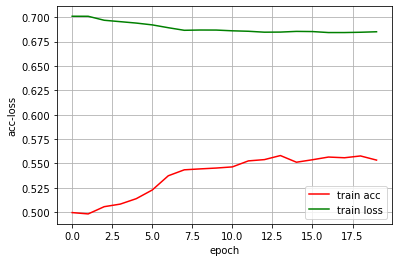

In [7]:
LSTMmodel.fit(x_train,
              y_train_label,
              epochs=20,
              callbacks = [history],
              batch_size = 883
             )
history.loss_plot('epoch')

In [265]:
LSTMmodel.evaluate(x_val,y_val_label)

3850/3850 [==============================] - 4s 930us/step


[0.6950458564386739, 0.5332467555999756]

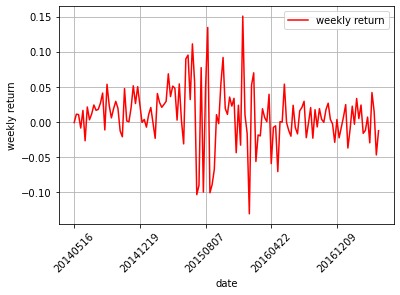

0.04176776210051342


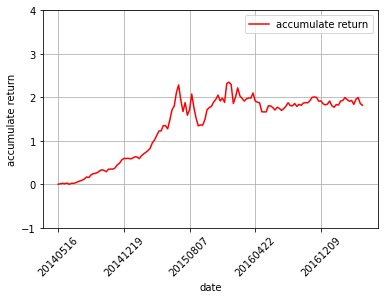

1.8147440061695441
0.22399892319631798


In [266]:
x_axis = val_date.copy()
acc_y_test = LSTMmodel.predict(x_val)
acc_y_test = acc_y_test.reshape(3850,1)
#将预测到的数据码成表格，25列
row_num = len(acc_y_test)//25
ls = list(range(row_num))
df_pred = pd.DataFrame({"order":ls})
for i in range(25):
    df_pred["p"+str(i+1)] =acc_y_test[i*row_num:i*row_num+row_num]
df_pred.drop("order",axis = 1,inplace = True)
#测试数据，也就是持有期的实际收益码成表格，25列
df_test = pd.DataFrame({"order":ls})
for i in range(25):
    df_test["p"+str(i+1)] =y_val[i*row_num:i*row_num+row_num]
df_test.drop("order",axis = 1,inplace = True)
#根据每一行的y_pred,得到大于0.5的位置，买入y_test里面对应位置且最大的5个收益率
rate = []

for i in range(row_num):
    row = df_pred.loc[i].tolist()
    #row = [r[0] for r in row]
    temp = []
    for k in range(5):
        if max(row)>0.5:
            large = row.index(max(row))
            temp.append(large)
            row[row.index(max(row))] = -1
        else:
            break
    average = 0.0
    for j in temp:
        average += df_test.loc[i].tolist()[j]
    if len(temp)==0:
        x_axis[i]=0
        continue
    else:
        average /= len(temp)
        rate.append(average)
for i in range(x_axis.count(0)):
    x_axis.remove(0)
#计算累计收益率
#画图
tick_spacing=30
fig, ax = plt.subplots(1,1)
ax.plot(x_axis,rate, 'r', label="weekly return")
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.grid(True)
plt.xlabel("date")
plt.ylabel('weekly return')
plt.legend(loc="upper right")
plt.xticks(rotation=45)
plt.show()


print(np.std(rate))
accumulate = rate.copy()
order = range(len(accumulate))
for i in order[1:]:
    accumulate[i] = (accumulate[i]+1)*(accumulate[i-1]+1)-1    
    
    
#画图
tick_spacing=30
fig, ax = plt.subplots(1,1)
ax.plot(x_axis,accumulate, 'r', label="accumulate return")
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.grid(True)
plt.xlabel("date")
plt.ylabel('accumulate return')
plt.legend(loc="upper right")
plt.ylim(-1,4)
plt.xticks(rotation=45)
plt.show()

print(accumulate[-1])
print(np.power(accumulate[-1]+1,25/128)-1)

## （4）用测试数据看效果

In [26]:
LSTMmodel = kr.models.load_model("model.h5")

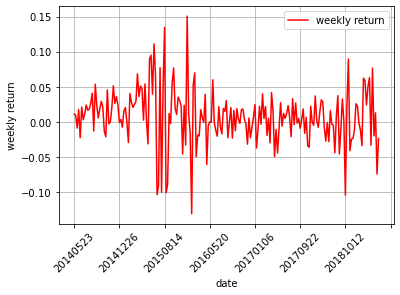

0.03893767445870503


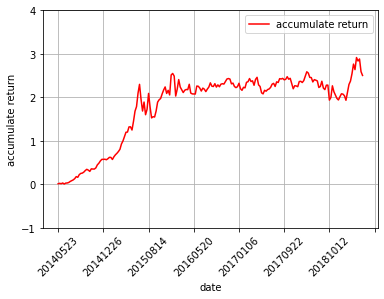

2.5006211243092045
0.27725714742805674


In [8]:
x_axis = test_date.copy()
acc_y_test = LSTMmodel.predict(x_test)
acc_y_test = acc_y_test.reshape(6400,1)
#将预测到的数据码成表格，25列
row_num = len(acc_y_test)//25
ls = list(range(row_num))
df_pred = pd.DataFrame({"order":ls})
for i in range(25):
    df_pred["p"+str(i+1)] =acc_y_test[i*row_num:i*row_num+row_num]
df_pred.drop("order",axis = 1,inplace = True)
#测试数据，也就是持有期的实际收益码成表格，25列
df_test = pd.DataFrame({"order":ls})
for i in range(25):
    df_test["p"+str(i+1)] =y_test[i*row_num:i*row_num+row_num]
df_test.drop("order",axis = 1,inplace = True)
#根据每一行的y_pred,得到大于0.5的位置，买入y_test里面对应位置且最大的5个收益率
rate = []

for i in range(row_num):
    row = df_pred.loc[i].tolist()
    #row = [r[0] for r in row]
    temp = []
    for k in range(5):
        if max(row)>0.5:
            large = row.index(max(row))
            temp.append(large)
            row[row.index(max(row))] = -1
        else:
            break
    average = 0.0
    for j in temp:
        average += df_test.loc[i].tolist()[j]
    if len(temp)==0:
        x_axis[i]=0
        continue
    else:
        average /= len(temp)
        rate.append(average)
for i in range(x_axis.count(0)):
        x_axis.remove(0)
#计算累计收益率
#画图
tick_spacing=30
fig, ax = plt.subplots(1,1)
ax.plot(x_axis,rate, 'r', label="weekly return")
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.grid(True)
plt.xlabel("date")
plt.ylabel('weekly return')
plt.legend(loc="upper right")
plt.xticks(rotation=45)
plt.show()


print(np.std(rate))
accumulate = rate.copy()
order = range(len(accumulate))
for i in order[1:]:
    accumulate[i] = (accumulate[i]+1)*(accumulate[i-1]+1)-1    
    
    
#画图
tick_spacing=30
fig, ax = plt.subplots(1,1)
ax.plot(x_axis,accumulate, 'r', label="accumulate return")
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.grid(True)
plt.xlabel("date")
plt.ylabel('accumulate return')
plt.legend(loc="upper right")
plt.ylim(-1,4)
plt.xticks(rotation=45)
plt.show()

print(accumulate[-1])
print(np.power(accumulate[-1]+1,25/128)-1)


In [270]:
rate1 = rate.copy()

In [271]:
np.std(rate1)

0.038099048221582506

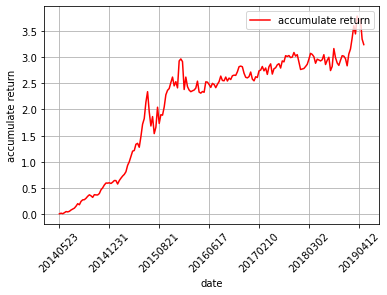

3.236095627661703
0.3257274512701367


In [22]:
tick_spacing=30
fig, ax = plt.subplots(1,1)
ax.plot(x_axis,accumulate, 'r', label="accumulate return")
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.grid(True)
plt.xlabel("date")
plt.ylabel('accumulate return')
plt.legend(loc="upper right")
plt.xticks(rotation=45)
plt.savefig("max.png")
plt.show()

print(accumulate[-1])
print(np.power(accumulate[-1]+1,25/128)-1)

# 验证数据集

In [122]:
val_data = j_return[11479:13481]
# train_data
x_val = np.zeros((3850,1,12))
y_val = np.zeros((3850,1))
y_val_label = np.zeros((3850,1))
val_date = []
for i in val_data.week_date:
    if i!=0:
        val_date.append(str(int(i)))
    else:
        continue
for i in range(25):
    temp = val_data["p"+str(i+1)].tolist()
    me = np.median(temp)
    #order = temp.copy()
    #order.sort()
    #per75 = order[int(0.75*len(order))]
    for j in range(len(temp)//13):
        x_val[i*154+j]=temp[j*13:j*13+12]
        y_val_label[i*154+j]= 0 if temp[j*13+12]<me or temp[j*13+12]==me else 1
        y_val [i*154+j]= temp[j*13+12]